# Линейная регрессия

## 1. Поиск градиента

Продолжить формулу для взятия векторной производной по х для функции квадрата ошибки <br>(в красивом формате со всеми значками угловых скобок, операторов и т. д.). После выполнения этого вы вспомните формулу градиента для квадратичной ошибки и поймете как писать формулы на языке математической верстки TeX

$$
f(x) = \|Ax - y\|^2 = (Ax - y)^T (Ax - y)
$$
$$
D_f(x) = d \langle (Ax - y)^T (Ax - y) \rangle =
$$
$$
= \langle d(Ax - y), (Ax - y) \rangle + \langle (Ax - y), d(Ax - y) \rangle =
$$
$$
= \langle (Ax - y), d(Ax - y) \rangle + \langle (Ax - y), d(Ax - y) \rangle =
$$
$$
= 2 \langle (Ax - y), d(Ax - y) \rangle =
$$
$$
= 2 \langle (Ax - y), A dx \rangle =
$$
$$
= 2 (Ax - y)^T A dx =
$$
$$
= 2 ((Ax - y)^T A)^{T^T} dx =
$$
$$
= 2 (A^T (Ax - y))^T dx =
$$
$$
D_f(x) = \langle 2 A^T (Ax - y), dx \rangle
$$
$$
D_f(x) = \langle \nabla f(x), dx \rangle \Rightarrow
$$
$$
\nabla f(x) = 2 A^T (Ax - y)
$$

## 2. Прямое решение через ноль производной

После пункта 1 у вас есть формула для градиента квадратичной функции ошибки. Она измеряет уровень "неверности" решения (вектора $\vec{x}$). Теперь её надо приравнять к 0 и построить формулу, чтобы узнать при каком x это происходит.

$$ \nabla f(x) = 2A^T(Ax - y) = 0$$
$$ A^TAx - A^Ty = 0 $$
$$ A^TAx = A^Ty $$
$$ x = (A^TA)^{-1}A^Ty$$

### 2.1 Реализация прямого решения

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

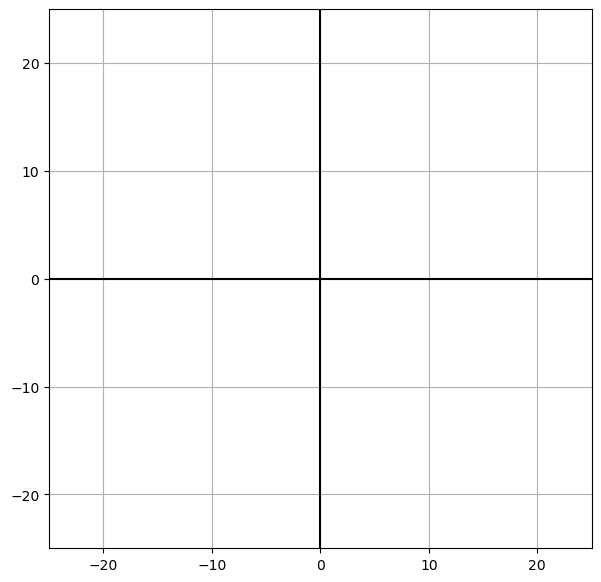

In [ ]:
# ваши параметры по вариантам
n = 9
a_orig = (-1)**n * 0.1 * n # по формуле (-1)^n * 0.1 * n, n - номер в списке группы
b_orig = n * (-1)**(n+1) # по формуле n*(-1)^(n+1), где n - номер в списке группы
random_state = n # х, где х - номер в списке группы

# это тот самый столбец который мы и должны отыскать будем нашими методами.
# сейчас конечно мы его знаем наперед потому что нам надо создать данные
# но в жизни мы изначально этих чисел не знаем и в жизни задача в том чтобы их найти
x_orig = np.array([a_orig, b_orig])

np.random.seed(random_state)

A = np.stack([np.arange(0, 25), np.ones(25)]).T

# @ - операция матричного умножения в библиотеке NumPy
y = A @ x_orig + np.random.standard_normal(25)
# добавили нормально распределённого шума в данных
# этим система станет несовместна для обычного решения

f, ax = plt.subplots(figsize=(7, 7))

# A[:, 0] - выбрать первый столбец, A[0, :] - выбрать первую строку
plt.scatter(A[:, 0], y)
print(f'Исходные данные: x_orig = {a_orig:.1f}, b_orig = {b_orig}')
ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
# рисуем координатные оси
ax.axvline(0, color="black")
ax.axhline(0, color="black")
ax.grid(True)

In [ ]:
A, y

### Вопрос - зачем был дописан вектор единиц справа к иксу?

ответ - Чтобы модель могла учитывать свободный член (сдвиг по оси y). Это делает модель линейной не только по наклону, но и по положению прямой. Это как
𝑦=𝑎𝑥+𝑏: добавление столбца единиц позволяет регрессии вычислить коэффициент 𝑏, что позволяет улучшить точность и соответсвтие данным.

In [ ]:
# допишите код для поиска a и b через 0 производной и выведите какой вышел результат
a_b_analytical = np.linalg.inv(A.T @ A) @ A.T @ y
print(f"Аналитическое решение(а, b): {a_b_analytical[0]:.4f}, {a_b_analytical[1]:.4f}")
print(f"Уравнение прямой: y = {a_b_analytical[0]:.4f}x + {a_b_analytical[0]:.4f}")

plt.figure(figsize=(7, 7))
plt.scatter(A[:, 0], y, label='Данные с шумом')
plt.plot(A[:, 0], A @ a_b_analytical, 'r-',
         label=f'Аналитическое решение: y = {a_b_analytical[0]:.4f}x + {a_b_analytical[1]:.4f}')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.title('Регрессия через нормальное уравнение')
plt.show()

In [ ]:
# постройте линию которая вышла рядом с изначальными данными
# изначальные данные
f, ax = plt.subplots(figsize=(7, 7))

plt.scatter(A[:, 0], y, label='Данные с шумом')
ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
ax.axvline(0, color='black')
ax.axhline(0, color='black')
ax.grid(True)

# линия которая обучилась
x_line = np.array([-25, 25])
y_line = a_b_analytical[0] * x_line + a_b_analytical[1]
# нужно вместо троеточий подсчитать значения y которые
# получаются при полученных параметрах линии
# в точках x1 = -25, x2 = 25, этим мы построим линию по 2 точкам
ax.plot(x_line, y_line, color='red', label=f'Регрессия: y = {a_b_analytical[0]:.4f}x + {a_b_analytical[1]:.4f}')
plt.legend()
plt.title('Регрессия через нормальное уравнение')
plt.show()

## 2. Решение с помощью градиентного спуска

С помощью найденных выше формул градиента, совершить шаги градиентного спуска для тех же данных.<br>
Подобрать значение $\alpha$, чтобы на графиках была видна сходимость за 10 шагов.<br> Начинаем с параметров 0, 0

In [ ]:
alpha = 0.0002
a_b_grad = np.array([0.0, 0.0])

for i in range(2000):
    # получаем градиент
    grad = 2 * A.T @ (A @ a_b_grad - y)
    # получаем антиградиент
    antigrad = -grad
    # обновляем наши параметры линии
    a_b_grad += alpha * antigrad
  # - изначальные данные
  # рисуем результат текущего шага
plt.figure(figsize=(7,7))
plt.scatter(A[:, 0], y, label='Данные с шумом')

plt.xlim(-25, 25)
plt.ylim(-25, 25)
plt.axvline(0, color='black')
plt.axhline(0, color='black')
x_line = np.array([-25, 25])
y_line = a_b_grad[0] * x_line + a_b_grad[1]
plt.legend()
plt.plot(x_line, y_line, 'r-', linewidth=2,
             label=f'Шаг {i+1}: y = {a_b_grad[0]:.4f}x + {a_b_grad[1]:.4f}')
plt.grid()
plt.title(f'Градиентный спуск по данным после шага {i+1}')
# - линия которая обучилась
plt.show()
print(f'\nАналитическое решение: a = {a_orig:.4f}, b = {b_orig:.4f}')
print(f'Результат градиентного спуска: a = {a_b_grad[0]:.4f}, b = {a_b_grad[1]:.4f}')